# Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Read the training data and test data. The training data contains the Survived column, but the test data doesn't, that is because that is exactly the output we need to get from out model. We will predict if passengers in the test data survived or not, and submit the results.

In [2]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA Steps
* Univariate Analysis - Look into Columns individually and try to plot them and see the pattern
* Bivariate Analysis - Analysis of Predictor vs Target Variable. 
* 2.1. Num vs Num - Scatterplot
* 2.2. Num vs Cat - Boxplot/ViolinPlot
* 2.3. Cat Vs Cat - pd.crosstab and then see if you can sns.countplot 
* 2.4. Two Faces Plot basis Category - Facetgrid Plot
* Missing Values - Columns you have missing values. (More than 90% Data is missing and there is no way to fill it then drop that variable)
* Outlier Analysis - Boxplot or Normal Distribution. Boxplots (q1-1.5IQR | Q3+1.5IQR). ND(<3-3>)
* Feature Engineering - Generalise the information in the data. This really helps in improving the overall performance of ML.
* Scaling and Transformation if needed. Remember never ever scale dummy variables - 0 and 1.

#### Get the target variable to be the Survived column, and remove that column from the training data.

Find the exact number of data that we have to study. like how many numbers present in the data is there any missing vallue and follow the EDA Procedeure.

In [5]:
servived = data_train["Survived"] # Data store into 'servived' veriable
train_copy = data_train.copy()  # Store copy of Train Dataset into 'train_copy' veriable
test_copy = data_test.copy() #   Store copy of Test Dataset into 'test_copy' veriable
train_test_full = pd.concat([train_copy, test_copy]) # Concat both data
n_r_tarin = len(train_copy)
n_r_test = len(test_copy)
n_r_full = n_r_tarin + n_r_test

C:\Users\PRAFUL\Anaconda3\Ana\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [6]:
print('size of Training data = ',train_copy.shape)
print('size of Test data = ',test_copy.shape)
print('size of concated data = ',train_test_full.shape)
print('no of rows in train dataset = ',n_r_tarin)
print('no of rows in train dataset = ',n_r_test)
print('no of rows after concating the data = ',n_r_full)

size of Training data =  (891, 12)
size of Test data =  (418, 11)
size of concated data =  (1309, 12)
no of rows in train dataset =  891
no of rows in train dataset =  418
no of rows after concating the data =  1309


So after analysing the data we have n = 891 rows of train data.

##### Univariate Analysis - Target Variable

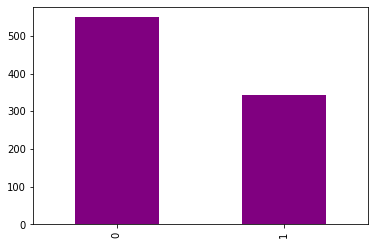

In [7]:
data_train.Survived.value_counts().plot(kind = "bar", color = "purple")
plt.show()
# Conclusion People died are more than Survived.

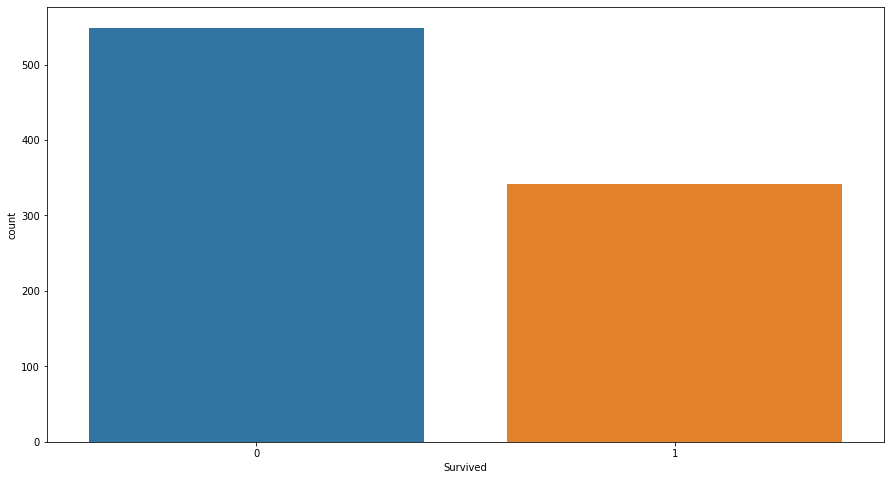

In [8]:
plt.figure(figsize = (15,8))
sns.countplot(data_train.Survived) # using Sns
plt.show()

In [9]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

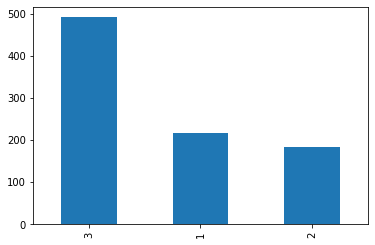

In [10]:
data_train.Pclass.value_counts().plot(kind = "bar")
plt.show()
# Class 03 count is higher and Class 02 is the lowest count.

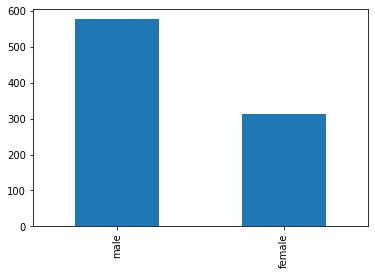

In [11]:
# Sex
data_train.Sex.value_counts().plot(kind = "bar")
plt.show()
# Conclusion: Males are higher than Females on Titanic.

In [12]:
data_train.Age.fillna(28, inplace = True)

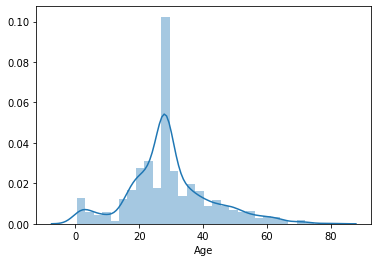

In [13]:
# Age - Histogram or Distplot
sns.distplot(data_train.Age) # Data appears to be quite normal
plt.show()

In [14]:
print('Null value present ',data_train.Age.isna().sum())
print('Null values present in data in Percentage ',round((data_train.Age.isna().sum()/data_train.Age.count())*100,3))

Null value present  0
Null values present in data in Percentage  0.0


In [15]:
data_train.Age.describe() # Here we see that the in Age column Mean and Q2(50th percenttile mence median is same)

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Ttest - Age vs Fare
data_train.Age.fillna(28, inplace = True) # replace the Na values with median

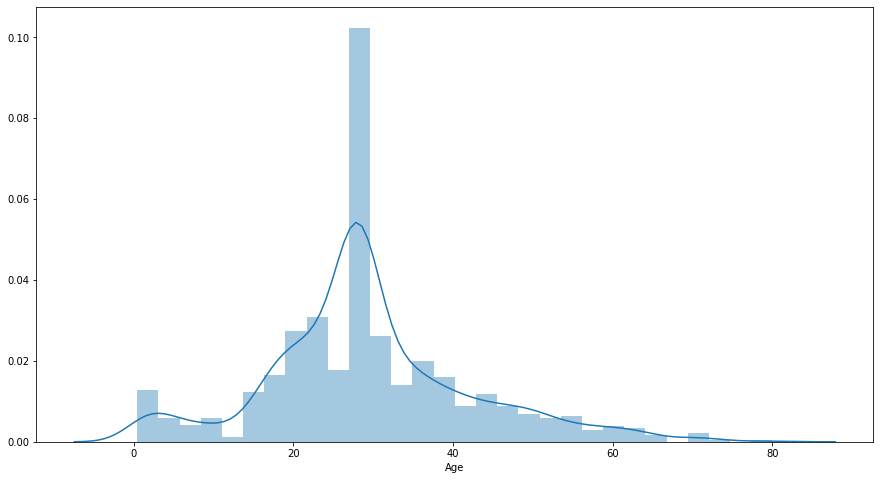

In [17]:
# Age - Histogram or Distplot
plt.figure(figsize = (15,8))
sns.distplot(data_train.Age) # Data appears to be quite normal
plt.show()

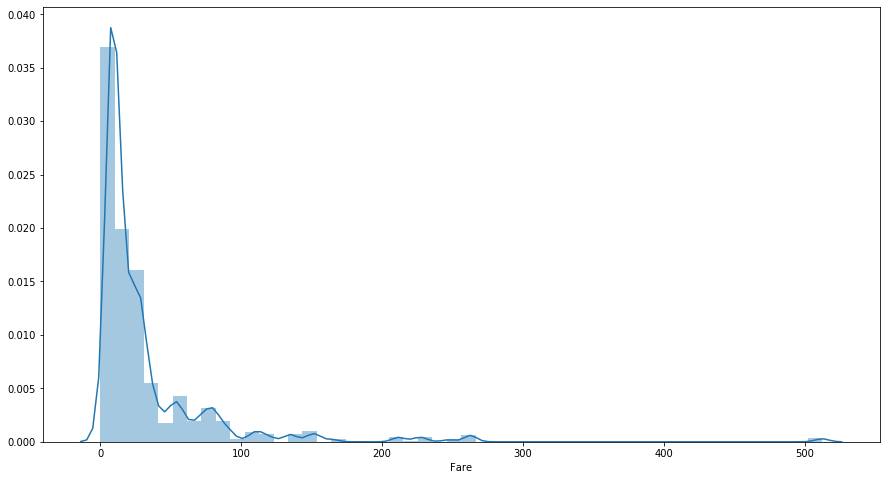

In [18]:
# Fare
plt.figure(figsize = (15,8))
sns.distplot(data_train.Fare)
plt.show()

In [19]:
data_train.Fare.describe()

# There is also a person who pay 0 rupies so may be he is a ship person (technician,cooks,servents etc.)
# There are the person who paid more then 500 pounds thatsw why also this graph look like this.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check in Data is there is any null values

In [21]:
data_train.isnull().sum()

# In prevous we alredy remove null values from 'Age' column
# In Cabin colmn there is most null values present because in cabil only crow memers are allowed,so passengers are conclude as null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data_train.Embarked.dropna(inplace = True) # Remove that two rows of data.

#### Feature Engineering

In [23]:
# Feature Engineering - Sibsp + Parch

data_train["Family"] = data_train.SibSp + data_train.Parch + 1 # Here we just add sibling and spounce with parent and
# count them mand just make column to find the size of family

In [24]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


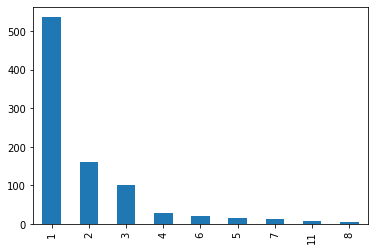

In [25]:
data_train.Family.value_counts().plot(kind = "bar")
plt.show()

In [26]:
data_train.Family.value_counts() # There we see that the family size

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [27]:
# Family_Cat - Singles - 1, Small Family - 02, Medium-03, 04 & >04: Large
def fam(x):
    if(x>=4):
        return('Large')
    elif(x==3):
        return("Medium")
    elif(x==2):
        return("Small")
    else:
        return("Singles")
    
data_train["Family_Cat"] = pd.Series(data_train.Family.apply(fam))

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


In [28]:
pd.crosstab(data_train.Survived, data_train.Family_Cat)

# Large Families died where as Singles and Small Families Survived.

Family_Cat,Large,Medium,Singles,Small
Survived,,,,
0,60,43,374,72
1,31,59,163,89


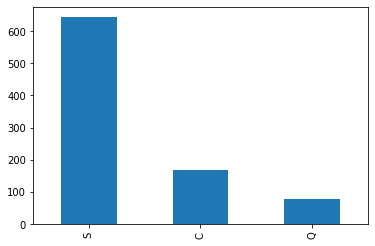

In [29]:
# Embarked
data_train.Embarked.value_counts().plot(kind = "bar")
plt.show()

# Lot of People boarded the ship from SouthHampton & Lowest Boarding No is from Queenstown.

### Summary of Univariate Analysis
* Fare is Skewed meaning people paid high fares as well. The Range is 0-512 where the Avg Fare is around 32.
* Age appears to be normal where Average Age is 29.6 and the Median age is 28.
* Lot of People boarded from SouthHampton and the leser count is observed from Queenstown.
* We created a New Variable(s) Family & Family_cat which we will use later to analyse in Bivariate.
* Hypothesis is Family Variable Survival is Dependent on the Frequency/Count - Chi Squares.
* More Males on Titanic in comparison to Females.
* Target Variable: People Survived are Less than the Ones who died.

# Bivariate Analysis

In [30]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


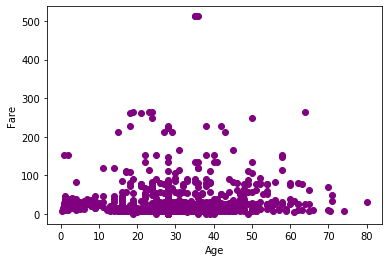

In [31]:
# Age Vs Fare Paid - Scatterplot

plt.scatter(data_train.Age, data_train.Fare, color = "Purple")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
# No Pattern in Age and Fare. Its random

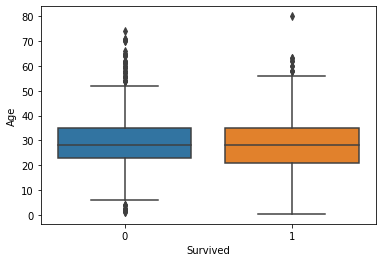

In [32]:
# Num Vs Cat - Survived vs Age

sns.boxplot(x = "Survived", y = "Age", data = data_train)
plt.show()

In [33]:
data_train.loc[data_train.Survived ==0, "Age"].describe()

count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64

In [34]:
data_train.loc[data_train.Survived==1, "Age"].describe() # loc[row_index,col_index]

# Conclusion: Old Age People have survived where as the max age of people who did not is 74.

count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


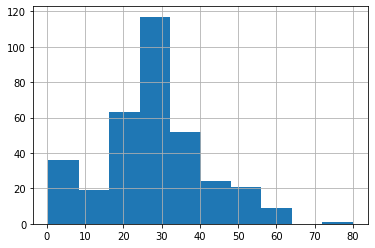

In [36]:
data_train.loc[data_train.Survived==1, "Age"].hist()
plt.show()

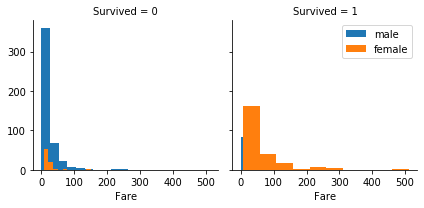

In [37]:
# Fare vs Survived - Facetgrid

g = sns.FacetGrid(data_train, col = 'Survived', hue = "Sex")
g.map(plt.hist, "Fare")
plt.legend()
plt.show()

In [38]:
data_train.loc[data_train.Survived==0, "Fare"].describe()

# Ho: People who paid high fare survived - Anova

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [39]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


In [40]:
# Ttest - Age vs Fare
data_train.Age.fillna(28, inplace = True)

In [41]:
# Ho: Average Age & Fare are Same. There is no difference between these variables
# Ho: There is no relation between Age and Fare
# H1: H0 is False
stats.ttest_ind(data_train.Age, data_train.Fare)

# Ho is True meaning that the Age and Fare have nothing in common.


Ttest_indResult(statistic=-1.6517448796950809, pvalue=0.09876295124022455)

In [42]:
# Age Has Something to do with the Survived Class
# Ho: There is no effect of Age on Survival.
# H1: There is some effect of Age on Survival

# One is Cat and Another is Numerical ~ Anova

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
model = ols("Age~Survived+Embarked+Family_Cat", data = data_train).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Embarked,2.0,255.106730,127.553365,0.822401,4.397119e-01
Family_Cat,3.0,12091.318121,4030.439374,25.986292,4.107165e-16
Survived,1.0,580.864687,580.864687,3.745130,5.328099e-02
Residual,882.0,136797.028866,155.098672,NaN,NaN


* 4.397119e-01>0.05 # Embarked - No Effect on Age
* 4.107165e-16>0.05 # Family_Cat has some relation with the Age.
* 5.328099e-02>0.05 # Target Variable has nothing to do with Age

In [44]:
# Family_Cat vs Survived
# Ho: There is no effect of Family Category on Survived Class
# H1: There is effect of Large vs Small Families on Survived Class

teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(data_train.Family_Cat, data_train.Survived))
print(pvalue)

4.6082741465220125e-11


* Since PValue is less than 0.05, we can say that Family_Cat has an impact on the Survived Col.
* From a ML Point of View, the **Family_Cat, SibSp & Parch are an important variable(s) for the Modelling.**

## Correlations
Let see how variables are related to each other. If two variables are correlated we can use that in our advantage to perform a better feature engineering and fill NaN values.



In [45]:
data_train.head()
data_train_corr = data_train.drop("PassengerId", axis=1).corr().abs().unstack().sort_values(ascending = False).reset_index()
data_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

data_train_corr_nd = data_train_corr.drop(data_train_corr[data_train_corr['Correlation Coefficient'] == 1.0].index)

In [46]:
data_train.drop(['PassengerId'],axis = 1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


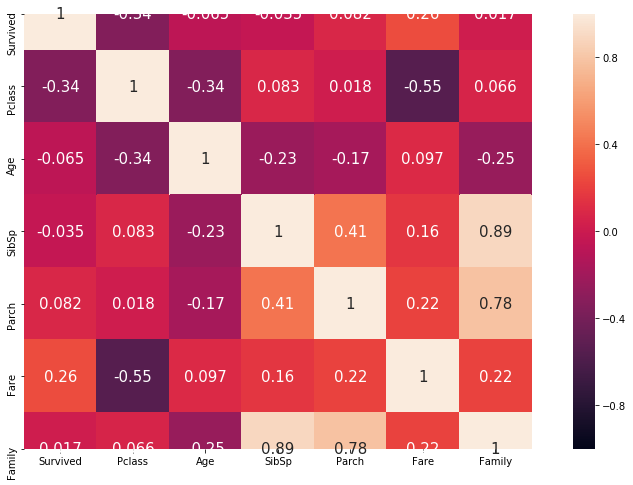

In [47]:
plt.figure(figsize = (15,8))
sns.heatmap(data_train.drop(['PassengerId'], axis=1).corr(), annot=True,square=True, annot_kws={'size': 15},vmin=-1, vmax=1)
plt.show()

## Missing Values
Is important to see if there are NaN values in both, the training set and the test set. For this we will use n_r_full and calculate the percentage of NaN values for every column.

In [48]:
(train_test_full.drop(["Survived"], axis = 1).isna().sum() / n_r_full ) * 100 # Percentage null values present in data

Age            20.091673
Cabin          77.463713
Embarked        0.152788
Fare            0.076394
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Ticket          0.000000
dtype: float64

The 77% of the Cabin column has NaN values, Age is the next with 20% and Fare and Embarked with less than 1%. We need to define a strategy to fill those NaN values.



#### Age
We can fill the age missing values with the median, but not the median of the whole passengers. Instead of that we will analyze the median age for genders and for classes.



In [49]:
df_median_age = data_train.groupby("Sex").median().drop([
    "PassengerId",
    "Survived",
    "Pclass",
    "SibSp",
    "Parch",
    "Fare",
    'Family'
], axis = 1)

df_median_age.head(10)

,Age
Sex,
female,28.0
male,28.0


In [50]:
df_median_age_class = data_train.groupby(["Sex", "Pclass"]).median().drop([
    "PassengerId",
    "Survived",
    "SibSp",
    "Parch",
    "Fare",
    'Family'
], axis = 1).transpose()

df_median_age_class.head(15)

Sex    female              male            
Pclass      1     2     3     1     2     3
Age      32.5  28.0  28.0  36.0  29.0  28.0

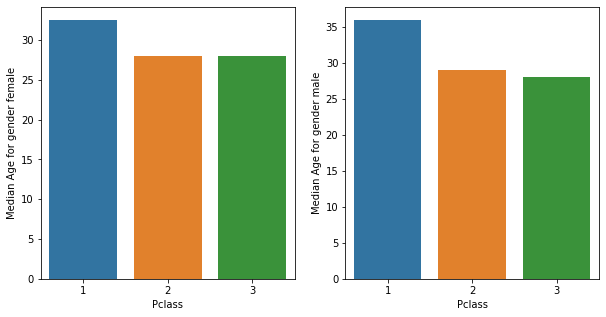

In [51]:
def display_age():
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

    ship_classes = df_median_age_class.columns.levels[1]
    median_age = {"female": [],
               "male": []}
    
    for i, k in enumerate(median_age.keys()):
        median_age[k] = [df_median_age_class[k][c][0] for c in ship_classes]
        sns.barplot(x = ship_classes, y = median_age[k], ax = axs[i])
        axs[i].set_xlabel("{}".format("Pclass"))
        axs[i].set_ylabel("Median Age for gender {}".format(k))    
        
    plt.show()
    
display_age()

From the table and the bar plots we can see that men tends to be older than women, and also that higher the class, older the person. So we can define now an strategy to fill the missing values for age based on gender and class.

In [52]:
def fill_na_age(row):
    row["Age"] = df_median_age_class[row["Sex"]][row["Pclass"]][0] if pd.isnull(row["Age"]) else row["Age"]
    return row

train_test_full = train_test_full.apply(fill_na_age, axis = 1)
train_test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Fare
Fare is highly correlated to the class, which makes sense, higher class, more expensive tickets. There is also a correlation with the family size, but not as strong as with the class variable.

In [53]:
df_median_fare_class = data_train.groupby(["Pclass"]).median().drop([
    "PassengerId",
    "Survived",
    "SibSp",
    "Parch",
    "Age",
    'Family'
], axis = 1).transpose()

df_median_fare_class.head()

Pclass,1,2,3
Fare,60.2875,14.25,8.05


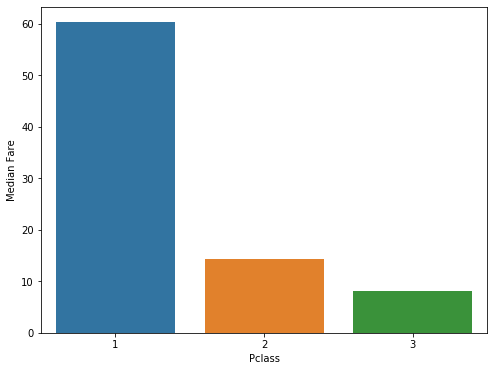

In [54]:
def display_fare():
    plt.figure(figsize=(8, 6))

    ship_classes = df_median_fare_class.columns
    median_fare = [df_median_fare_class[c][0] for c in ship_classes]
    sns.barplot(x = ship_classes, y = median_fare)
    plt.xlabel("{}".format("Pclass"))
    plt.ylabel("Median Fare")    
        
    plt.show()


display_fare()

In [55]:
train_test_full[train_test_full["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


**The only passenger with missing is passenger with id = 1044, which was placed in  3𝑟𝑑  class.**


In [56]:
def fill_na_fare(row):
    row["Fare"] = df_median_fare_class[row["Pclass"]][0] if pd.isnull(row["Fare"]) else row["Fare"]
    return row

train_test_full = train_test_full.apply(fill_na_fare, axis = 1)
train_test_full.info()
train_test_full[train_test_full["PassengerId"] == 1044]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,8.05,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


We can see now that the there are no missing values in the **Fare** column and that the passenger with missing Fare now has a Fare value of $8.05$, which is the median of the fare for passengers in class 3.

#### Embarked

According to the summary of our data there are two missing values on the **Embarked** column. Let's take a look to those values.

In [57]:
train_test_full[train_test_full["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Both passengers were on first class, and both survived. Also they had the same ticket number, so they should traveled together.

In [58]:
embarked_survived = data_train.groupby(["Embarked", "Survived"])["PassengerId"].count()
embarked_survived.head(10)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

According to the graph bellow, the passengers that embarked in port C (Cherbourg), had more chances to survive.

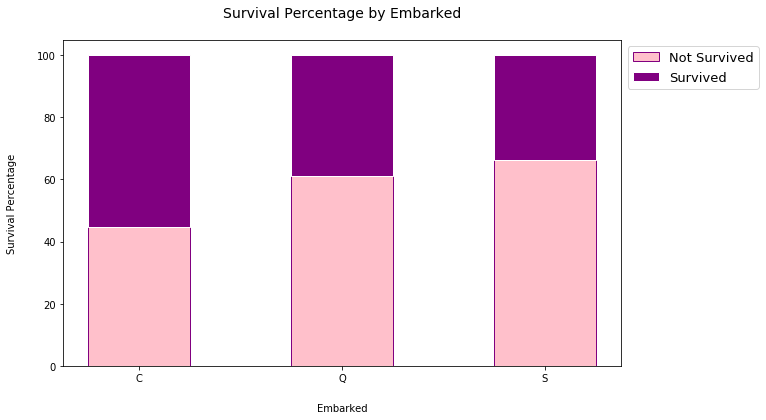

In [80]:
def display_embarked_prob():
    surv_counts = {
        "C": {}, 
        "Q": {}, 
        "S": {}
    }
    
    classes = set(embarked_survived.index.get_level_values(0))  
    
    for c in classes:
        for survive in range(0, 2):
            surv_counts[str(c)][survive] = embarked_survived[c][survive]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    df_survived_percentages = pd.DataFrame(surv_percentages).transpose()
    class_names = ("C", "Q", "S")
    bar_count = np.arange(len(class_names))  
    bar_width = 0.5
    
    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(bar_count, not_survived, color='pink', edgecolor='purple', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='purple', edgecolor='white', width=bar_width, label="Survived")
    
    plt.xlabel('Embarked', size=10, labelpad=20)
    plt.ylabel('Survival Percentage', size=10, labelpad=20)
    plt.xticks(bar_count, class_names)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 13})
    plt.title('Survival Percentage by Embarked', size=14, y=1.05)
    
    plt.show()

display_embarked_prob()

Now let see how the classes are distributed according to the embarked port. Accordinf to the list bellow, most passengers embarked on port S (Southampton), we can assign weights to differents ports depending on the class and then randomly assign a port according to the computed weights. For example we have that for class 1, around 59% of passengers embarked on port S, 40% on port C, and 1% on port Q. We can get a random number $r$ between $[0,1]$, and if $r \leq 0.59$ we assign it to port S, if $r \leq 0.99$ we assign it to port C, otherwise assign it to port Q. 

In [60]:
embarked_class_passengers = data_train.groupby("Pclass")["Embarked"].value_counts()
print(embarked_class_passengers)

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64


In [61]:
import random

def fill_na_embarked(row):
    row_class = row["Pclass"]
    total_class_passengers = embarked_class_passengers[row_class].sum()
    class_embarked_dist = embarked_class_passengers[row_class].cumsum() / total_class_passengers
    r = random.uniform(0, 1)
    
    if pd.isnull(row["Embarked"]):
        for port in class_embarked_dist.index:
            if r <= class_embarked_dist[port]:
                row["Embarked"] = port
                break
    
    return row

train_test_full = train_test_full.apply(fill_na_embarked, axis = 1)
train_test_full.info()
train_test_full[train_test_full["PassengerId"].isin([62, 830])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,S,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,C,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Both passengers with NaN as Embarked port, have been assigned a port, in this case, port S, if we set those values to NaN and apply the ```fill_na_embarked``` function again we can end up with different values. 

#### Cabin

For the *Cabin* columns, more than 77% of the data is missing, so we are tempted to just ignore this column for our model. But it makes sense that cabin location in the ship could be a survival factor, since cabins located in the lower levels of the ship should had less chanced to survive, since they were the first to flood. So based on this, let's take a look to the few data that we have.

In [62]:
data_train["Cabin"].sample(10)

585     E68
336      C2
94      NaN
21      D56
491     NaN
711    C124
554     NaN
295     NaN
566     NaN
325     C32
Name: Cabin, dtype: object

1. Seems that cabin number is composed by a letter and a number, perhaps the letter can mean something, let's compare the relation between cabin letter and survival. But first we will create a new feature called "CabinId" that will contain only the initial letter of the cabin number.

In [63]:
train_test_full["CabinId"] = train_test_full["Cabin"].map(lambda cabin: cabin if pd.isnull(cabin) else cabin[0])
data_train["CabinId"] = data_train["Cabin"].map(lambda cabin: cabin if pd.isnull(cabin) else cabin[0])
data_train["CabinId"].sample(10)

611    NaN
338    NaN
822    NaN
427    NaN
348    NaN
539      B
247    NaN
198    NaN
477    NaN
319      E
Name: CabinId, dtype: object

Looking at the graph bellow and with our limited data, seems that cabin has indeed influence on the survival. Having cabins B, D, and E better chances to survive than the others.

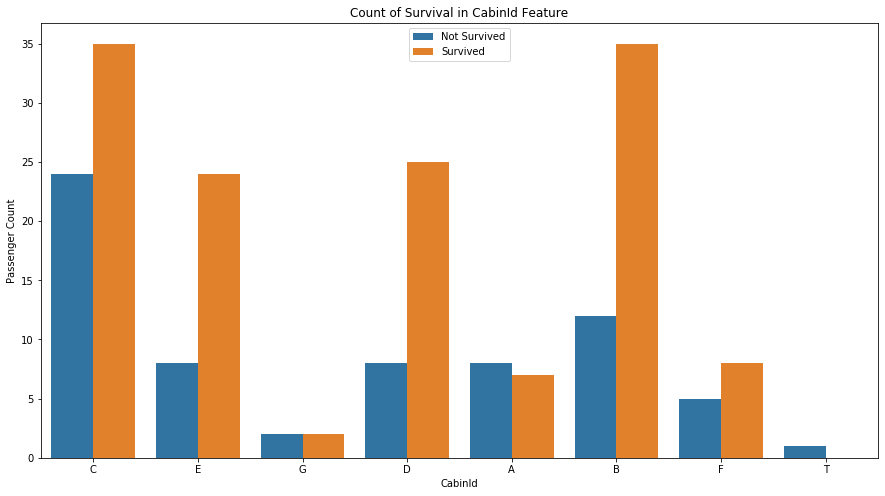

In [64]:
plt.figure(figsize=(15, 8))
sns.countplot(x="CabinId", hue='Survived', data=data_train)

plt.xlabel('{}'.format("CabinId"))
plt.ylabel('Passenger Count')    
plt.tick_params(axis='x')
plt.tick_params(axis='y')
    
plt.legend(['Not Survived', 'Survived'], loc='upper center')
plt.title('Count of Survival in CabinId Feature')
plt.show()

It makes sense that depending on the class, passengers were located in some cabins. Let's see if that is true.

In [65]:
data_train.groupby(["CabinId", "Pclass"])["PassengerId"].count()

CabinId  Pclass
A        1         15
B        1         47
C        1         59
D        1         29
         2          4
E        1         25
         2          4
         3          3
F        2          8
         3          5
G        3          4
T        1          1
Name: PassengerId, dtype: int64

* Cabins A, B, C there were only passengers of class 1, with cabin C having the most of them. 
* Passengers of class 1 were also placed on cabins D and E, and they are majorith on those cabins.
* Cabin D is conformed by passengers of classes 1 (29) and 2 (4).
* Cabin E id conformed by passengers of classes 1 (25), 2 (4), and 3 (3)
* Cabin F had passengers of classes 2, and 3.
* Cabin G only had passengers of class 3.
* Cabin T has only one passenger, and is fron class 1. Perhaps a special guest, why is not located on cabins A, B, C with the rest of class 1 passengers? 

With this data we will assign a passenger with NaN as CabinId, a new CabinId depending on the class. Following the same process when we filled NaN values on the Embarked column, we will create a distribution based on weights for each class in order to assign a new CabinId.   

In [66]:
class_cabin_passengers = data_train.groupby(["Pclass", "CabinId"])["PassengerId"].count()
print(class_cabin_passengers)

Pclass  CabinId
1       A          15
        B          47
        C          59
        D          29
        E          25
        T           1
2       D           4
        E           4
        F           8
3       E           3
        F           5
        G           4
Name: PassengerId, dtype: int64


In [67]:
import random

def fill_na_cabin_id(row):
    row_class = row["Pclass"]
    total_class_passengers = class_cabin_passengers[row_class].sum()
    class_cabin_dist = class_cabin_passengers[row_class].cumsum() / total_class_passengers
    rand = random.uniform(0, 1)
    
    if pd.isnull(row["CabinId"]):
        for cabinId in class_cabin_dist.index:
            if rand <= class_cabin_dist[cabinId]:
                row["CabinId"] = cabinId
                break
    
    return row

train_test_full = train_test_full.apply(fill_na_cabin_id, axis = 1)
train_test_full.info()
train_test_full[["Pclass", "CabinId"]].sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
CabinId        1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


,Pclass,CabinId
226,2,F
569,3,E
103,3,G
139,1,B
23,1,C
330,3,F
142,3,G
8,3,G
674,2,D
247,2,F


The *CabinId* column has no NaN values, and according to the sample above, seems reasonable the cabin assignment according to the passenger class.

## Data Distribution

In order to have a better understanding of the data we will analyze how numeric and non-numeric data is distributed, and how different variables interact with each other.

### Categorical Features

Let's split the data by gender and see how many survivers from each gender 

In [68]:
survival_by_gender = data_train.groupby("Sex").apply(lambda df: sum(df["Survived"] == 1))
survival_by_gender

Sex
female    233
male      109
dtype: int64

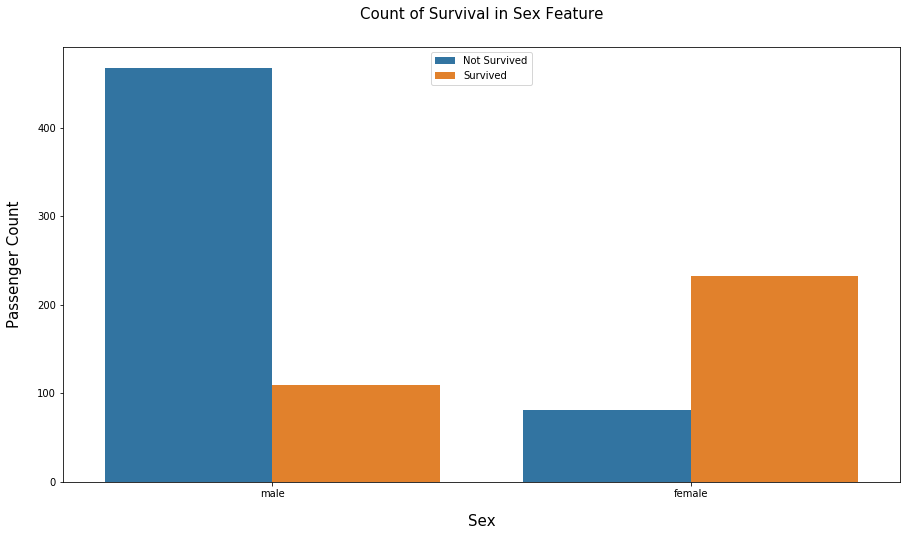

In [69]:
plt.figure(figsize=(15, 8))
sns.countplot(x="Sex", hue='Survived', data=data_train)

plt.xlabel('Sex', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)    

    
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Count of Survival in Sex Feature', size=15, y=1.05)
plt.show()

In [70]:
survival_by_gender["female"] / (survival_by_gender["female"] + survival_by_gender["male"])

0.6812865497076024

68% of the surivers were females, which means that there is a strong correlation between surivival and gender. Now let's see just by curiosity if the people in higher classes had more opportunities to surive or not. Something that I remember from the movie Titanic, is that people in lower classes were placed in the lowest levels of the ship, make it more difficult for them to escape.

In [71]:
survival_by_class = data_train.groupby("Pclass")["Survived"].apply(lambda x: {"Survived": sum(x == 1), "Not Survived": sum(x == 0)})
df1 = pd.DataFrame(survival_by_class)
df1

Survived
Pclass                       
1      Survived           136
       Not Survived        80
2      Survived            87
       Not Survived        97
3      Survived           119
       Not Survived       372

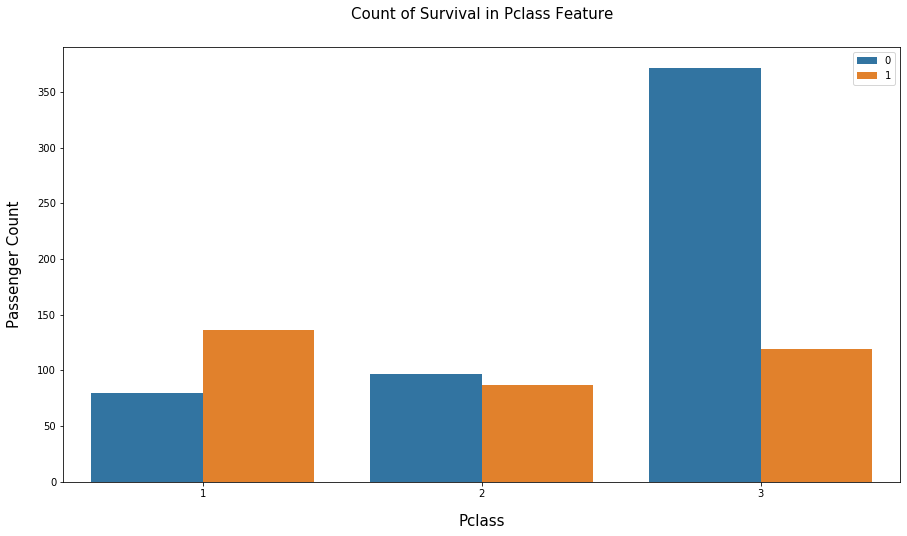

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(x="Pclass", hue='Survived', data=data_train)

plt.xlabel('Pclass', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)    

plt.legend()
plt.title('Count of Survival in Pclass Feature', size=15, y=1.05)
plt.show()

From the 491 passengers from 3rd class, 24% survived, from 2nd class 47% survived, and from 1st class 63% surivived. Based on these numbers, it seems that being on the 1st class give it better chances for survival. Perhaps there were more males in 3rd class, let'see how many males and females per class were in the ship.

In [73]:
gender_by_class = data_train.groupby("Pclass")["Sex"].apply(lambda x: {"Male": sum(x == "male"), "Female": sum(x == "female")})
df1 = pd.DataFrame(gender_by_class)
df1

Sex
Pclass            
1      Male    122
       Female   94
2      Male    108
       Female   76
3      Male    347
       Female  144

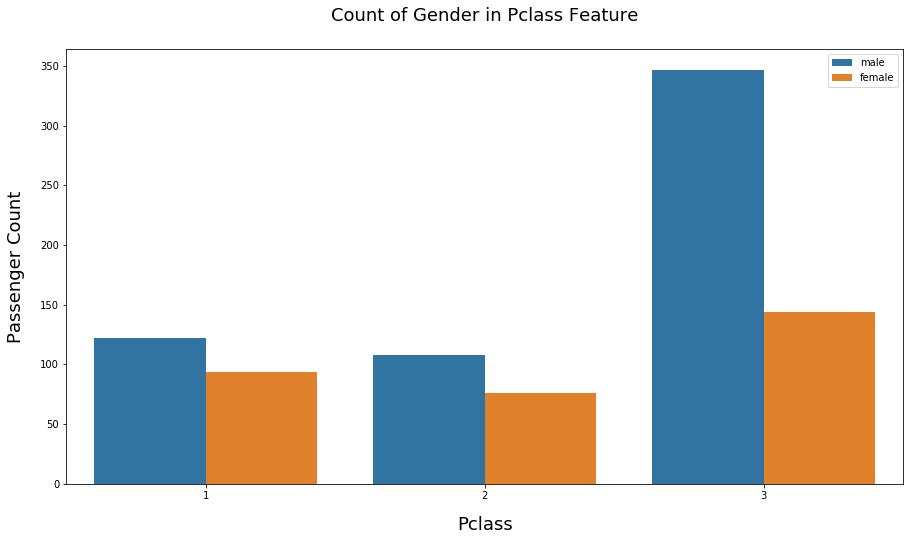

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(x="Pclass", hue='Sex', data=data_train)

plt.xlabel("Pclass", size=18, labelpad=15)
plt.ylabel('Passenger Count', size=18, labelpad=15)    
plt.legend()
plt.title('Count of Gender in Pclass Feature', size=18, y=1.05)
plt.show()

So far it seems that being on 1st class or 2nd class gives you some advantage for survival, and also being a woman gives you more chances for survival. Next we will show the survival rate for each gender and for each class.

In [75]:
df_class_survived = data_train.groupby(['Pclass', "Survived", "Sex"]).count().drop(columns=[
    'Age', 
    'SibSp', 
    'Parch', 
    'Fare', 
    'Embarked',
    'Cabin', 
    'PassengerId',
    'Family_Cat',
    'Family',
    'Ticket']).rename(columns={'Name':'Count'}).transpose()

df_class_survived.head(15)

Pclass        1                       2                       3              \
Survived      0           1           0           1           0           1   
Sex      female male female male female male female male female male female   
Count         3   77     91   45      6   91     70   17     72  300     72   
CabinId       3   56     78   39      1    2      9    4      2    4      4   

Pclass         
Survived       
Sex      male  
Count      47  
CabinId     2

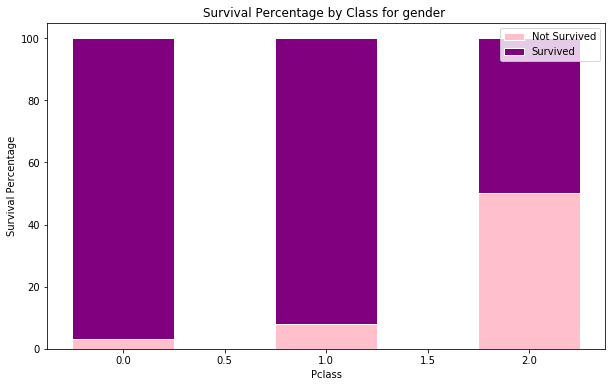

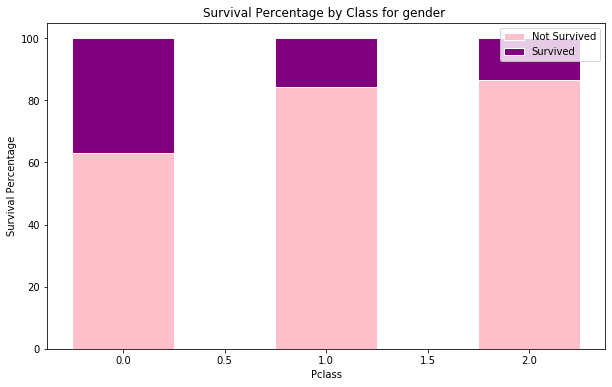

In [76]:
def display_gender_by_class_prob(gender):
    surv_counts = {
        "1": {}, 
        "2": {}, 
        "3": {}
    }
    
    classes = df_class_survived.columns.levels[0]    
    
    for c in classes:
        for survive in range(0, 2):
            surv_counts[str(c)][survive] = df_class_survived[c][survive][gender][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    df_survived_percentages = pd.DataFrame(surv_percentages).transpose()
    class_names = ("1", "2", "3")
    bar_count = np.arange(len(class_names))  
    bar_width = 0.5
    
    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(bar_count, not_survived, color='pink', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='purple', edgecolor='white', width=bar_width, label="Survived")
    
    plt.xlabel('Pclass')
    plt.ylabel('Survival Percentage')
  
    
    plt.legend()
    plt.title('Survival Percentage by Class for gender ')
    
    plt.show()

display_gender_by_class_prob("female")
display_gender_by_class_prob("male")

The results were very interesting, it seems that a female in 1st and 2nd class had good opportunities to survive, more than 90% chance. On the other hand a woman in the 3rd class had 50 - 50 chance to survive. 

On the other hand, men in 1st class apparently had better chances to survive than men in the other classes, with a survival rate of around 34%. 

Split the training data in 80% for training and 20% for validation

In [77]:
numerical_columns = ["Age", "SibSp", "Parch", "Fare"]
categorical_columns = ["Pclass", "Embarked", "Sex"]
feature_columns = numerical_columns + categorical_columns

data_train = data_train[feature_columns]
data_test = data_test[feature_columns]
data_train.head()

,Age,SibSp,Parch,Fare,Pclass,Embarked,Sex
0,22.0,1,0,7.2500,3,S,male
1,38.0,1,0,71.2833,1,C,female
2,26.0,0,0,7.9250,3,S,female
3,35.0,1,0,53.1000,1,S,female
4,35.0,0,0,8.0500,3,S,male


70% of the passengers on 3rd class were males, which can be the reason of why there were less survivers in 3rd class.

Let's see how many NaN values has our training data and validation data.

In [78]:
data_train.isna().sum() # How many NA we have per columns. 

Age         0
SibSp       0
Parch       0
Fare        0
Pclass      0
Embarked    2
Sex         0
dtype: int64

In [79]:
data_train["Embarked"].mode()

0    S
dtype: object

## Clean Data

Now that we have a better idea of the kind of data we have, we will proceed to clean that data and define some pre-processing steps to do that.

* For imputation of numerical columns, in this case only Age has NaN values, we will use the mean of the values in the Age column to fill those values.
* For  the Embarked column there are only 2 missing values, so we will fill it with the most repeated value, and then we will use the *OneHotEncoder* to translate that column into integer values that can be interpreted by our model.